In [4]:
!pip install pandas numpy scikit-learn matplotlib seaborn xgboost

In [36]:
import pandas as pd
import numpy as np
!pip install plotly
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [2]:
from google.colab import files
uploaded = files.upload()

Saving shopping_trends.csv to shopping_trends (1).csv


In [9]:
df = pd.read_csv('shopping_trends.csv')

In [10]:
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [23]:
df.shape

(3900, 19)

In [24]:
df.dtypes

,0
Customer ID,int64
Age,int64
Gender,object
Item Purchased,object
Category,object
Purchase Amount (USD),float64
Location,object
Size,object
Color,object
Season,object


In [11]:
print("Missing values:")
print(df.isnull().sum())

Missing values:
Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64


In [26]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   float64
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [12]:
# Convert categorical variables to appropriate types
df['Age'] = df['Age'].astype(int)
df['Purchase Amount (USD)'] = df['Purchase Amount (USD)'].astype(float)

In [13]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
       Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000  


Observing the overall distribution of customer ages in the dataset

In [30]:
df['Age'].value_counts()

,count
Age,
69,88
57,87
41,86
25,85
49,84
50,83
54,83
27,83
62,83


In [32]:
df['Age'].mean()

44.06846153846154

In [33]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [34]:
df['Age_category'] = pd.cut(df['Age'], bins= [0,15, 18 , 30 , 50 , 70] , labels= ['child' , 'teen' , 'Young Adults' ,'Middle-Aged Adults'
                                                                                             , 'old'] )

In [39]:
fig = px.histogram(df, y = 'Age' , x = 'Age_category')
fig.show()

Observing how the average purchase amount vary across different product categories

In [40]:
df.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Payment Method',
       'Shipping Type', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases', 'Preferred Payment Method',
       'Frequency of Purchases', 'Age_category'],
      dtype='object')

In [42]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

In [43]:
df[['Category','Purchase Amount (USD)']]

,Category,Purchase Amount (USD)
0,Clothing,53.0
1,Clothing,64.0
2,Clothing,73.0
3,Footwear,90.0
4,Clothing,49.0
...,...,...
3895,Clothing,28.0
3896,Accessories,49.0
3897,Accessories,33.0
3898,Footwear,77.0


In [44]:
df.groupby('Category')['Purchase Amount (USD)'].sum()

,Purchase Amount (USD)
Category,
Accessories,74200.0
Clothing,104264.0
Footwear,36093.0
Outerwear,18524.0


In [45]:
df.groupby('Category')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Category,
Accessories,59.838710
Clothing,60.025331
Footwear,60.255426
Outerwear,57.172840


Purchse by Gender

<Axes: xlabel='Gender', ylabel='Purchase Amount (USD)'>

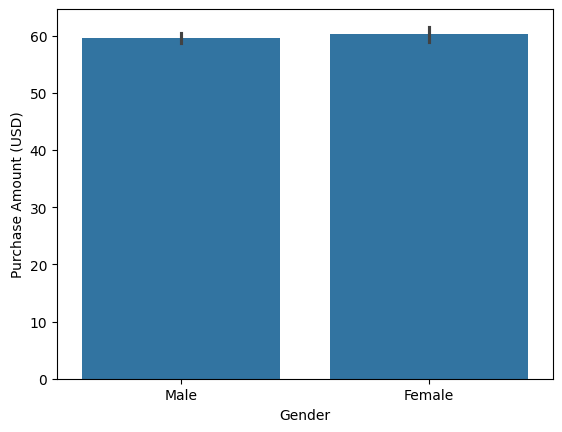

In [46]:
sns.barplot(df , x = 'Gender' , y = 'Purchase Amount (USD)')

Purchase by category

In [47]:
df.groupby('Category')['Item Purchased'].value_counts()

Category     Item Purchased
Accessories  Jewelry           171
             Belt              161
             Sunglasses        161
             Scarf             157
             Hat               154
             Handbag           153
             Backpack          143
             Gloves            140
Clothing     Blouse            171
             Pants             171
             Shirt             169
             Dress             166
             Sweater           164
             Socks             159
             Skirt             158
             Shorts            157
             Hoodie            151
             T-shirt           147
             Jeans             124
Footwear     Sandals           160
             Shoes             150
             Sneakers          145
             Boots             144
Outerwear    Jacket            163
             Coat              161
Name: count, dtype: int64

<ipython-input-48-f4fa0de08ad6>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




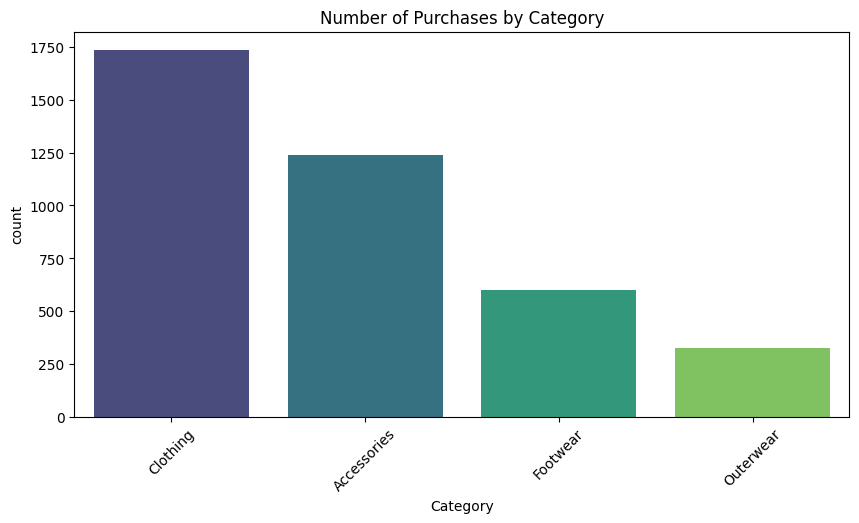

In [48]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette='viridis')
plt.title('Number of Purchases by Category')
plt.xticks(rotation=45)
plt.show()

Purchase by season

In [49]:
df['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [50]:
df['Season'].value_counts()

,count
Season,
Spring,999
Fall,975
Winter,971
Summer,955


<ipython-input-15-e1d81ed91e57>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Season', order=df['Season'].value_counts().index, palette='coolwarm')


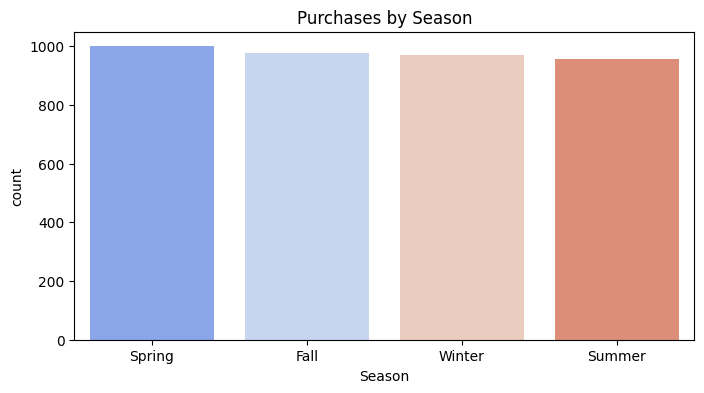

In [15]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Season', order=df['Season'].value_counts().index, palette='coolwarm')
plt.title('Purchases by Season')
plt.show()

The average rating given by customers for each product category

In [51]:
df.groupby('Category')['Review Rating'].mean()

,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


In [52]:
df_groupby = df.groupby('Category')['Review Rating'].mean().reset_index()
print(df_groupby)

      Category  Review Rating
0  Accessories       3.768629
1     Clothing       3.723143
2     Footwear       3.790651
3    Outerwear       3.746914


In [54]:
fig = px.bar(df_groupby ,x= 'Category' , y = 'Review Rating' )
fig.show()

Checking notable differences in purchase behavior between subscribed and non-subscribed customers

In [55]:
df['Subscription Status'].value_counts()

,count
Subscription Status,
No,2847
Yes,1053


<Axes: xlabel='Subscription Status', ylabel='Purchase Amount (USD)'>

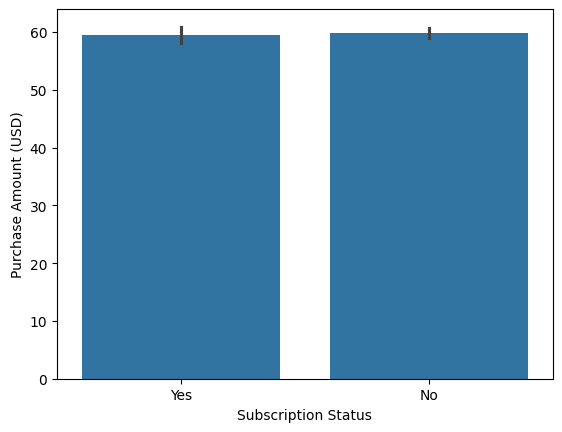

In [56]:
sns.barplot(df, x = 'Subscription Status', y = 'Purchase Amount (USD)')

In [57]:
df['Purchase Amount (USD)'].sum()

233081.0

In [58]:
df.groupby('Subscription Status')['Purchase Amount (USD)'].mean()

,Purchase Amount (USD)
Subscription Status,
No,59.865121
Yes,59.491928


Payment method is the most popular among customers

<ipython-input-16-a53e63f84ccb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Preferred Payment Method', order=df['Preferred Payment Method'].value_counts().index, palette='magma')


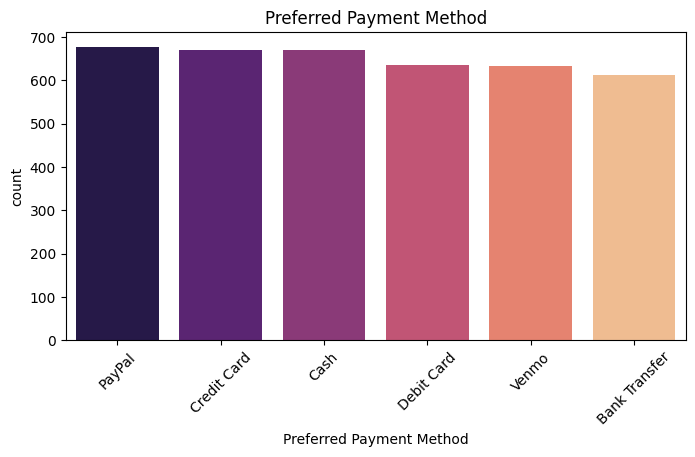

In [16]:
# EDA: Preferred Payment Method
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Preferred Payment Method', order=df['Preferred Payment Method'].value_counts().index, palette='magma')
plt.title('Preferred Payment Method')
plt.xticks(rotation=45)
plt.show()

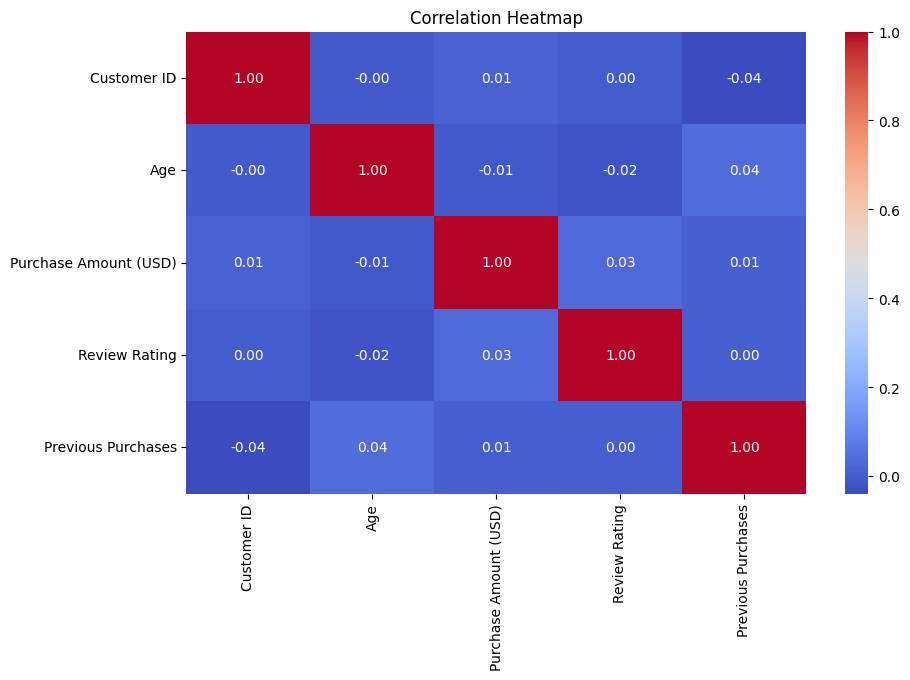

In [17]:
# Heatmap for Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Correlations between the size of the product and the purchase amount

In [64]:
df_group = df.groupby('Size')['Purchase Amount (USD)'].sum().reset_index()

In [65]:
fig  = px.bar(df_group, x = 'Size' , y ='Purchase Amount (USD)'  )
fig.show()

In [67]:
df['Category'].unique()

array(['Clothing', 'Footwear', 'Outerwear', 'Accessories'], dtype=object)

Observing how discount affect the purchase decision of customers

In [68]:
df_group = df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

In [69]:
px.histogram(df_group , x = 'Discount Applied' , y = 'Purchase Amount (USD)')

In [70]:
fig = px.sunburst(df, path = ['Gender' , 'Discount Applied'], values='Purchase Amount (USD)' , color= 'Gender')

fig.show()

colors that are more popular among customers

In [72]:
px.histogram(df, x = 'Color')

In [73]:
df['Color'].value_counts().nlargest(5)

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169


Average number of previous purchases made by customers

In [74]:
df['Previous Purchases'].mean()

25.35153846153846

Differences in purchase behavior between different locations

In [75]:
df.groupby('Location')['Purchase Amount (USD)'].mean().sort_values(ascending = False)

,Purchase Amount (USD)
Location,
Alaska,67.597222
Pennsylvania,66.567568
Arizona,66.553846
West Virginia,63.876543
Nevada,63.379310
Washington,63.328767
North Dakota,62.891566
Virginia,62.883117
Utah,62.577465


Shipping type preferred by customers for different product categories

In [76]:
df_group = df.groupby('Location')['Purchase Amount (USD)'].mean().reset_index()

In [66]:
df.groupby('Category')['Shipping Type'].value_counts().sort_values(ascending= False)

Category     Shipping Type 
Clothing     Standard          297
             Free Shipping     294
             Next Day Air      293
             Express           290
             Store Pickup      282
             2-Day Shipping    281
Accessories  Store Pickup      217
             Next Day Air      211
             Standard          208
             2-Day Shipping    206
             Express           203
             Free Shipping     195
Footwear     Free Shipping     122
             Standard          100
             Store Pickup       98
             Express            96
             Next Day Air       93
             2-Day Shipping     90
Outerwear    Free Shipping      64
             Express            57
             Store Pickup       53
             Next Day Air       51
             2-Day Shipping     50
             Standard           49
Name: count, dtype: int64

In [77]:
fig = px.bar(df_group, x = 'Location' , y = 'Purchase Amount (USD)')
fig.show()

Relationship between customer age and the category of products they purchase

In [78]:
df_group = df.groupby('Category')['Age'].mean().reset_index()
fig = px.bar(df_group ,y = 'Age' , x= 'Category')
fig.show()

Observing how the average purchase amount differ between male and female customers

In [79]:
df_group = df.groupby('Gender')['Purchase Amount (USD)'].sum().reset_index()
fig = px.bar(df_group , x = 'Gender' , y = 'Purchase Amount (USD)')
fig.show()
px.sunburst(data_frame= df, path = ['Gender' ,'Age_category'] , values='Purchase Amount (USD)')

/usr/local/lib/python3.11/dist-packages/plotly/express/_core.py:1727: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [63]:
df[['Age' , 'Age_category']]

,Age,Age_category
0,55,old
1,19,Young Adults
2,50,Middle-Aged Adults
3,21,Young Adults
4,45,Middle-Aged Adults
...,...,...
3895,40,Middle-Aged Adults
3896,52,old
3897,46,Middle-Aged Adults
3898,44,Middle-Aged Adults


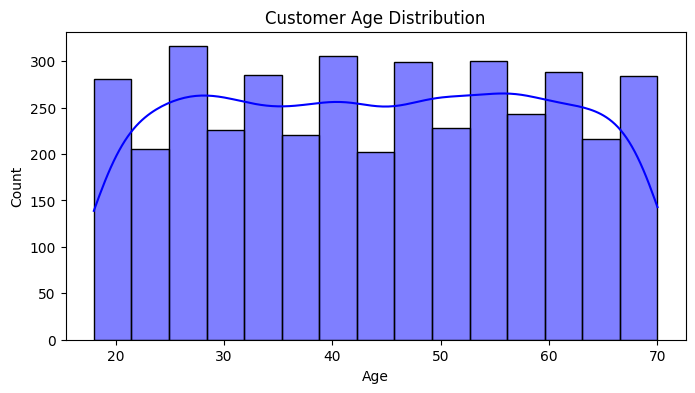

In [18]:
# Customer Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=15, kde=True, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.show()

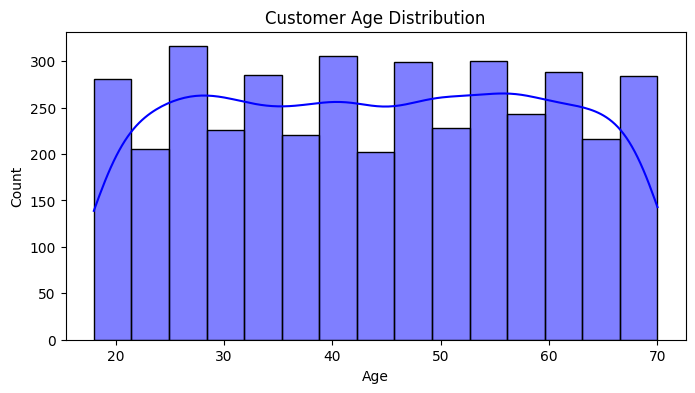

In [19]:
# Customer Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], bins=15, kde=True, color='blue')
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.show()

Customers who use promo codes tend to spend more than those who don't

In [60]:
df_groupby  = df.groupby('Promo Code Used')['Purchase Amount (USD)'].sum().reset_index()

In [61]:
fig = px.sunburst(df, path=['Gender' , 'Promo Code Used'] , values='Purchase Amount (USD)')
fig.show()

In [62]:
fig  =  px.bar(df_groupby , x= 'Promo Code Used' , y = 'Purchase Amount (USD)')
fig.show()